Stock Price Prediction Model using Python and Machine Learning - Joseph Kim (2-7-2026): This program uses an LSTM artificial recurrent neural network to predict the closing stock price of a corporation using the past 60 day stock price. 

In [ ]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# look at several stocks. The safest and most interesting stocks right now: AAPL, NKE, GOOGL, NVDA
# other interesting stocks to look at: medtronic (MDT)

df = yf.download('AAPL', start='2016-01-01', end='2026-01-01')

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753153,23.757663,22.997832,23.135368,270597600
2016-01-05,23.157919,23.865891,23.090279,23.843345,223164000
2016-01-06,22.704723,23.081258,22.517585,22.673158,273829600
2016-01-07,21.746473,22.576199,21.741965,22.249270,324377600
2016-01-08,21.861464,22.346222,21.816370,22.219960,283192000
...,...,...,...,...,...
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800


In [ ]:
df.shape

(2514, 5)

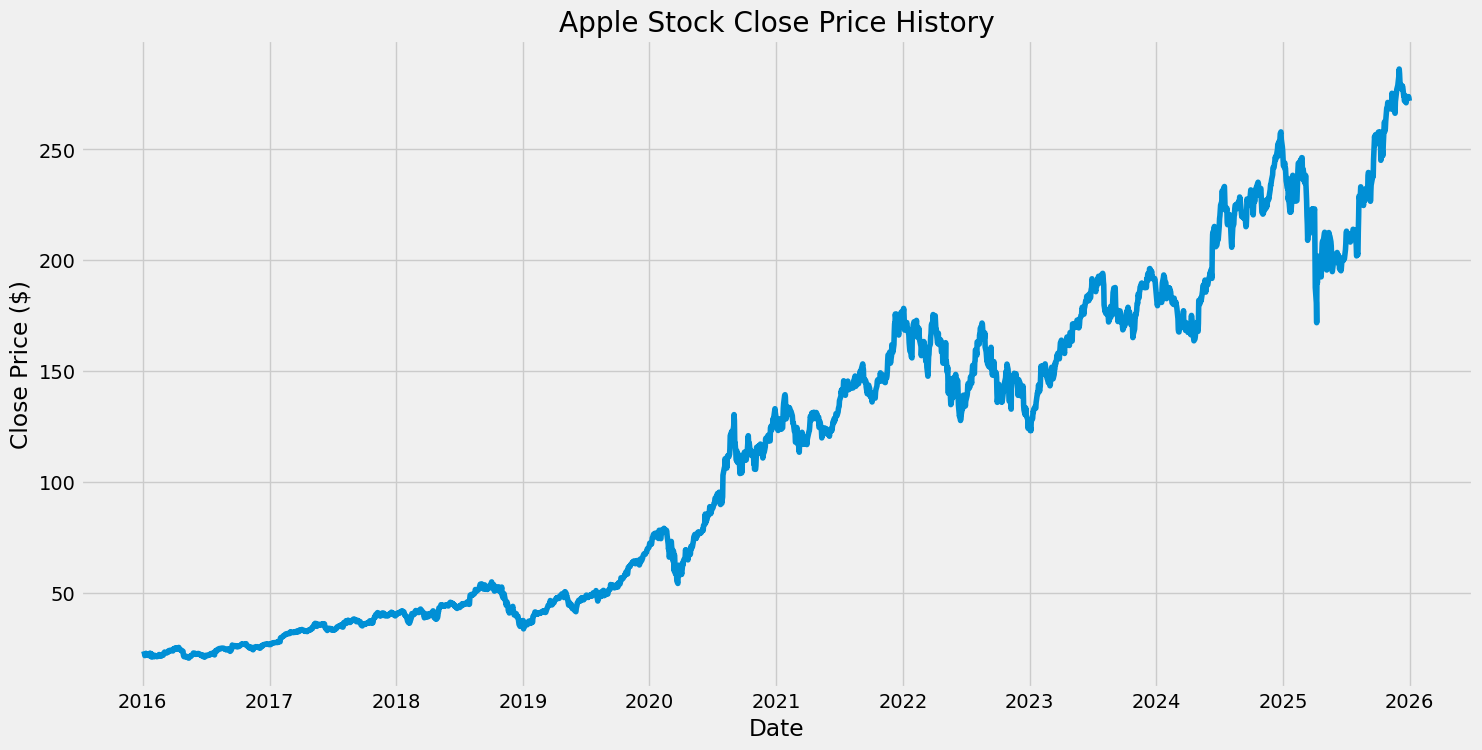

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Apple Stock Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [ ]:
# Creating a numpy array from the dataframe
data = df['Close']
dataset = data.values
dataset


training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2012

Preprocessing the dataset: Scaling and Encoding

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01185709],
       [0.00961588],
       [0.00790948],
       ...,
       [0.95319785],
       [0.95063738],
       [0.94604376]], shape=(2514, 1))

In [ ]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    # print the first iteration
    #if i <= 60:
    #    print(X_train)
    #    print(y_train)


In [ ]:
# convert training datasets into numpy arrays (2 dimensional)
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1952, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # convert to three dimensions

# Create the ANN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\Joseph\Desktop\dsci560\dsci560-lab4\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1) # Train the model

1952/1952 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - loss: 8.0205e-04


In [ ]:
# Create the testing dataset, through a new array containing scaled values
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [ ]:
x_test = np.array(x_test)
#X_test.shape

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [ ]:
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

np.float64(13.02444084319967)

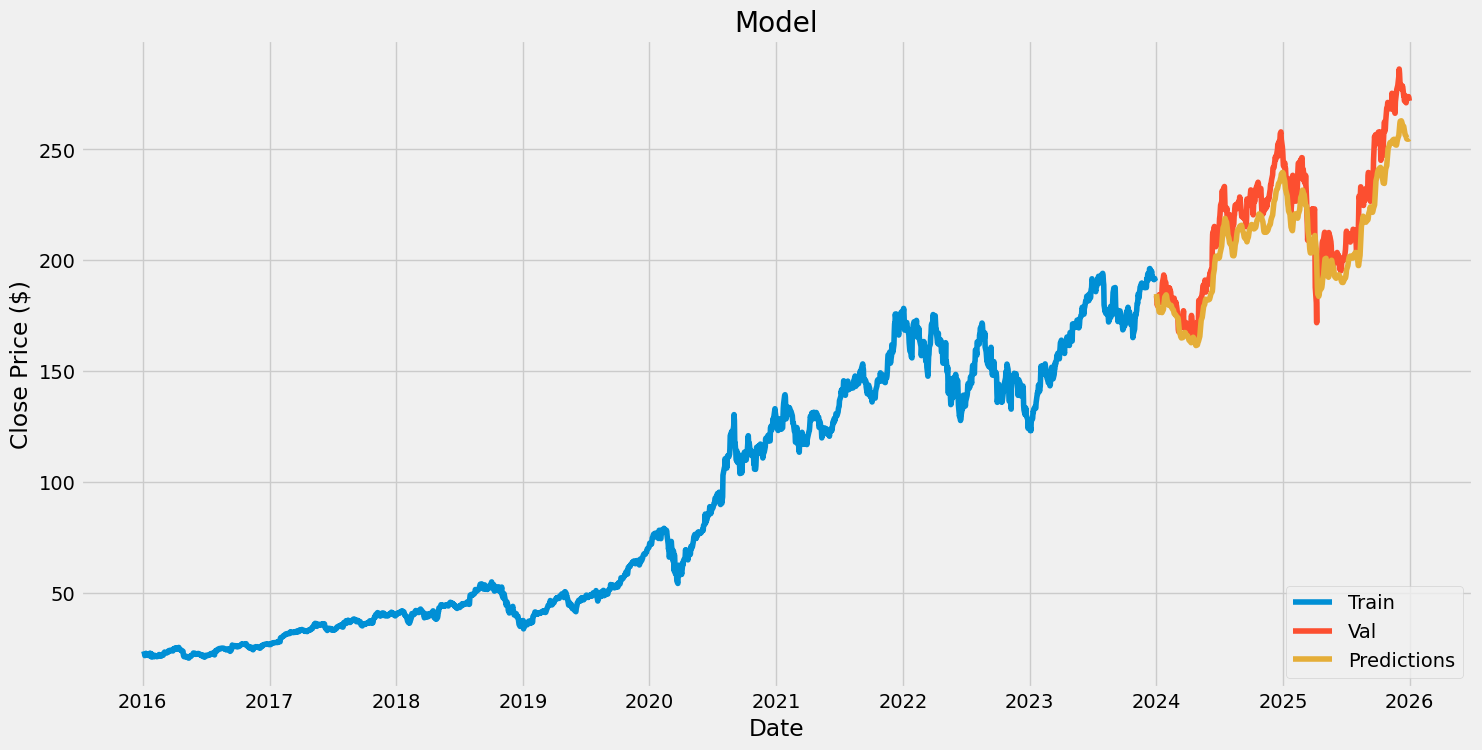

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid[['Close', 'Predictions']]

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-01-02,183.903244,184.802979
2024-01-03,182.526230,183.650787
2024-01-04,180.208130,182.139114
2024-01-05,179.484940,180.346848
2024-01-08,183.824005,178.542709
...,...,...
2025-12-24,273.809998,254.682205
2025-12-26,273.399994,254.563324


In [ ]:
quote = yf.download('AAPL', start='2014-01-01', end='2024-07-31')
new_df = quote.filter(['Close'])
last_60_days = new_df[-60:]

last_60_days

In [ ]:
quote = yf.download('AAPL', start='2014-01-01', end='2024-07-31')
new_df = quote.filter(['Close'])
last_60_days = new_df[-60:]

last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed


ValueError: at least one array or dtype is required

: 

In [ ]:
quote2 = yf.download('AAPL', start='2024-08-01', end='2024-08-02')
print(quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-08-01    218.360001
Name: Close, dtype: float64
